# CV2 / PIL / matplotlib

## 注意事项
- opencv读取图片是bgr，其他是rgb

In [59]:
import numpy as np
from PIL import Image
im = Image.open("data/image/lena.jpg")
im = im.resize([500,500])
im = im.rotate(10)
im = im.crop([100,100,500,500])
print(im.getpixel((0,0)))
im_gray = im.convert('L')
print(im.width,im.height)
im_array = np.array(im_gray)
print(im_array.shape)
#im.show()
#im_gray.show()
im_gray = im.convert('P')
#im_gray.show()
r,g,b = im.split()
im = Image.merge('RGB',[r,g,b])
#im.thumbnail([80,80])

(199, 84, 87)
400 400
(400, 400)


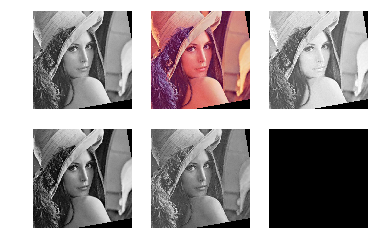

In [202]:
#%matplotlib
import matplotlib.pyplot as plt
plt.figure(num='astronaut',figsize=(6,4))
plt.subplot(2,3,1)
plt.axis("off")
plt.imshow(im_array/255,cmap="gray")
plt.subplot(2,3,2)
plt.axis("off")
plt.imshow(im)
plt.subplot(2,3,3)
plt.axis("off")
plt.imshow(np.array(im)[:,:,0],plt.cm.gray)
plt.subplot(2,3,4)
plt.axis("off")
plt.imshow(np.array(im)[:,:,1],origin="upper",cmap=plt.cm.gray)
plt.subplot(2,3,5)
plt.axis("off")
plt.imshow(np.array(im)[:,:,2],plt.cm.gray)
plt.subplot(2,3,6)
plt.axis("off")
plt.imshow(np.array(im)/255)
a = np.ones([100,100])/100
plt.imshow(a,plt.cm.gray)
plt.show()

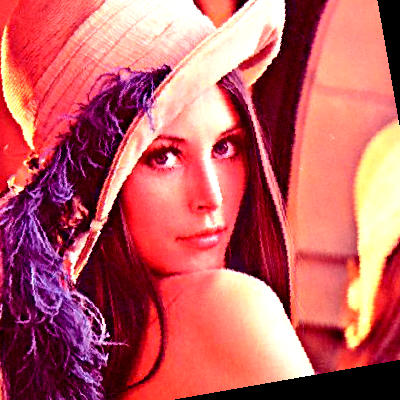

In [39]:
import PIL.ImageEnhance as ie
ie.Brightness(im).enhance(0.8)
ie.Color(im).enhance(0.2)
ie.Sharpness(im).enhance(1)
ie.Contrast(im).enhance(2)

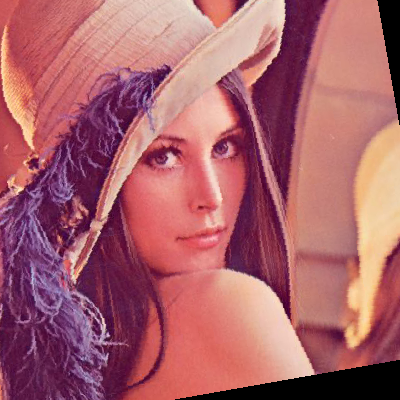

In [73]:
import cv2
from PIL import Image, ImageDraw, ImageFont
im_color = np.array(im)
im_bgr = cv2.cvtColor(im_color,cv2.COLOR_RGB2BGR)
im_gray = cv2.cvtColor(im_color,cv2.COLOR_RGB2GRAY)
_,im_binary = cv2.threshold(im_gray,125,255,1)
im_rec = cv2.rectangle(im_color,(100,100),(200,200),1)
font = ImageFont.truetype('/System/Library/Frameworks/ApplicationServices.framework/Versions/A/Frameworks/ATS.framework/Versions/A/Support/FontSubsets/Yuanti.ttc', 40)
im_txt = cv2.putText(im_color,"my text!",(0,20),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0))
draw = ImageDraw.Draw(im)
draw.text((100,100), u"中文", font=font, fill=(0,0,0))
Image.fromarray(im_rec)
im